# Lab 2: Data Manipulation

This lab is about data. 

To do deep-learning effectively, we'll need to be able to work with data of all shapes and sizes. At the end of this section, we will be able to explore data visually and do simple descriptive statistics using Python and Pandas.

## Many types of data

Data comes in many forms, formats, and sizes. For example, as a data scientist at a web company, data will probably be accessible in as records in a database. We can think of these as huge spreadsheets, with rows and columns containing numbers. 

On the other hand, if we are developing a method to **detect cancer from brain scans**, we will deal with images and video data, very often these files will be significant in size (or number) and possibly in complicated formats. 

If we are trying to **detect a signal for trading stocks** based on information in news articles, our data will often be millions of text documents.

If we are **translating the spoken language to text**, our input data will be sound files, and so on.

Traditionally Machine Learning has been relatively good at dealing with "tabular" data, while "unstructured" data such as text, sound, and images, were each addressed with very sophisticated, domain-specific techniques. 

**Deep Learning is particularly good at efficiently learning ways to represent such "unstructured" data**, and this is one of the reasons for its enormous success. Neural net models can be used to solve a translation problem or an image classification problem, without worrying too much about the type of underlying data.

The first reason why Deep Learning is so popular is this: it can deal with many different types of data.

Before we can train models on our data, we need to gather the data and provide it to our networks in a consistent format. Let's take a look at a few different types of data and learn about the tools we'll be using to process and explore them.

### Tabular Data

The most straightforward data to feed to a Machine Learning model is so-called *tabular data*. It's called _tabular_ because it can be represented in a table with rows and columns, very much like a spreadsheet. Let's use an example to define some common vocabulary that we will throughout the labs.

![Common terms for tabular data](./assets/features.png)

A **row** in a table corresponds to a **datapoint**, and it's often referred to as a *record*. A *record* is a **list of attributes** (extracted from a data point), which are often numbers, categories, or free-form text. These attributes go by the name of *features*. 

According to Bishop <sup>[1](#bishop)</sup>, in Machine Learning a *feature* is an **individual measurable property** of a phenomenon being observed. In other words, **features are the properties we are using to characterize our data**.

Features can be directly measurable or inferred from other features. Think, for example, of the number of times a user visited a website or the browser they used - both of which can be directly counted. We could also create a _new feature_ from existing data such as the average time _between_ two user visits. The process of calculating new features is called *feature engineering*.

That said, not all the features can be as informative. Some may be entirely irrelevant for what we are trying to do. For example, if we are trying to predict how likely a user is to buy our product, it is plausible that his/her **first name will have no predictive power**. On the other hand, **previous purchases may carry a lot of information** concerning propensity to buy.

Traditionally *feature engineering* (extracting or inventing "good" features) and *feature selection* (keeping only the "good" features) have received much emphasis. Deep Learning bypasses these steps by automatically figuring out the relevant features and building higher order features deeper in the network.

Here is another reason why Deep Learning is so popular: it automates the complicated process of feature engineering.

<a name="bishop">1</a>: *Bishop, Christopher (2006). Pattern recognition and Machine Learning. Berlin: Springer. ISBN 0-387-31073-8.*

## Data Exploration with Pandas

When building a predictive model, it's often helpful to get some quick facts about our dataset. We may spot some very evident problems with the data that we may want to address. This first phase is called *data exploration* and consists of a series of questions that we want to ask:

- How big is our dataset?
- How many features do we have?
- Is any record corrupted or missing information for one or more features?
- Are the features numbers or categories?
- How is each feature distributed? Are they correlated?

We want to ask these questions early to decide how to proceed further without wasting time. For example, if we have too few data points, we may not have enough samples to train a Machine Learning model. Our first step, in that case, will be to go out and gather more data. If we have missing data, we need to decide what to do about it. Do we delete the records missing data or do we *impute* (create) the missing data? Moreover, if we impute the data, how do we decide the value? If we have many features, but only a few of them are not constant, we'd better eliminate the constant features first, because they will undoubtedly have no predictive power, and so on.

Python comes with a library that allows addressing all these questions very easily, called _Pandas_.

Let's load it in our notebook.

In [1]:
import pandas as pd

[Pandas](https://pandas.pydata.org/) is an open source library that provides high-performance, easy-to-use data structures, and data analysis tools. It can load data from a multitude of sources including CSV, JSON, Excel, HTML, PDF and many others ([here](https://pandas.pydata.org/pandas-docs/stable/io.html) you may find all the types of file that it can load, together with a short description). Let's start by loading a CSV file.

>TIP: A comma-separated values file ([CSV](https://en.wikipedia.org/wiki/Comma-separated_values)) stores tabular data (numbers and text) in plain text. Each line of the file is a data record, and each record consists of one or more fields, separated by commas.

Before we do anything else, let's also set a couple of standard options that will help us to contain the size of the tables displayed. We configure pandas to show at most 13 rows of data in a data frame and 7 columns. Bigger data frames will be truncated with ellipses.

In [2]:
pd.set_option("display.max_rows", 13)
pd.set_option("display.max_columns", 7)
pd.set_option("display.latex.repr", False)
pd.set_option('max_colwidth', 30)

Notice here that the `display.latex.repr` is only set to `True` for the PDF version of the labs, while it is `False` for the other versions. Starting from the next lab, we'll group all the configurations in a single script. Let's now load the data from the `titanic-train.csv` file:

In [3]:
df = pd.read_csv('../data/titanic-train.csv')

This is a popular dataset containing information about passengers of the Titanic, such as their name, age, and if they survived.

`pd.read_csv` will read the CSV file and create a _Pandas DataFrame object_ from it. A [DataFrame](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#dataframe) is a labeled, 2D data-structure, much like a spreadsheet.

Now that we have imported the Titanic data into a Pandas DataFrame object, we can inspect it. Let's start by peeking into the first few records to get a feel for how DataFrames work.

`df.head()` displays the first five lines of the DataFrame. We can see it as a table, with column names inferred from the CSV file and an index, indicating the row it came from:

In [4]:
df.head()

,PassengerId,Survived,Pclass,...,Fare,Cabin,Embarked
0,1,0,3,...,7.2500,NaN,S
1,2,1,1,...,71.2833,C85,C
2,3,1,3,...,7.9250,NaN,S
3,4,1,1,...,53.1000,C123,S
4,5,0,3,...,8.0500,NaN,S


`df.info()` summarizes the content of the DataFrame, letting us know the index range, the number, and names of columns with their data type. 

We also learn about missing entries. For example, notice that the `Age` column has a few `null` entries.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


`df.describe()` summarizes the numerical columns with some basic stats: count, min, max, mean, standard deviation and so on.

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


This is very useful to compare the scale of different features and decide if we need to rescale some of them.

### Indexing

We can access individual elements of a DataFrame. Let's see a few ways. 

We can get the fourth row of the DataFrame (numerical index 3) using `df.iloc[3]`

In [7]:
df.iloc[3]

PassengerId                                4
Survived                                   1
Pclass                                     1
Name           Futrelle, Mrs. Jacques Hea...
Sex                                   female
Age                                       35
SibSp                                      1
Parch                                      0
Ticket                                113803
Fare                                    53.1
Cabin                                   C123
Embarked                                   S
Name: 3, dtype: object

We can fetch elements corresponding to indices 0-4 and column 'Ticket':

In [8]:
df.loc[0:4,'Ticket']

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

We can obtain the same result by selecting the first five elements of the column 'Ticket', with `.head()` command:

In [9]:
df['Ticket'].head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

To select multiple columns, we pass the list of columns:

In [10]:
df[['Embarked', 'Ticket']].head()

,Embarked,Ticket
0,S,A/5 21171
1,C,PC 17599
2,S,STON/O2. 3101282
3,S,113803
4,S,373450


### Selections

Pandas is smart about indices and allows us to write expressions. For example, we can get the list of passengers with `Age` over `70`:

In [11]:
df[df['Age'] > 70]

,PassengerId,Survived,Pclass,...,Fare,Cabin,Embarked
96,97,0,1,...,34.6542,A5,C
116,117,0,3,...,7.7500,NaN,Q
493,494,0,1,...,49.5042,NaN,C
630,631,1,1,...,30.0000,A23,S
851,852,0,3,...,7.7750,NaN,S


To understand what this does, let's break it down. `df['Age'] > 70` returns a boolean Series of values that are `True` when the `Age` is greater than `70` (and `False` otherwise). The length of this series is the same as that of the whole DataFrame, as you can check by running:

In [12]:
len(df['Age'] > 70)

891

Passing this series to the `[]` operator, selects only the rows for which the boolean series is `True`. In other words, Pandas matches the index of the DataFrame with the index of the Series and selects only the rows for which the condition is `True`. 

We can obtain the same result using the `query` operator.

In [13]:
df.query("Age > 70")

,PassengerId,Survived,Pclass,...,Fare,Cabin,Embarked
96,97,0,1,...,34.6542,A5,C
116,117,0,3,...,7.7500,NaN,Q
493,494,0,1,...,49.5042,NaN,C
630,631,1,1,...,30.0000,A23,S
851,852,0,3,...,7.7750,NaN,S


We can use the `&` and `|` Python operators (which do bitwise and bitwise or, respectively) to combine conditions. For example, the next statement returns the records of passengers 11 years old and with five siblings/spouses.

In [14]:
df[(df['Age'] == 11) & (df['SibSp'] == 5)]

,PassengerId,Survived,Pclass,...,Fare,Cabin,Embarked
59,60,0,3,...,46.9,NaN,S


If we use an `or` operator, we'll have passengers that are 11 years old or passengers with five siblings/spouses.

In [15]:
df[(df.Age == 11) | (df.SibSp == 5)]

,PassengerId,Survived,Pclass,...,Fare,Cabin,Embarked
59,60,0,3,...,46.9000,NaN,S
71,72,0,3,...,46.9000,NaN,S
386,387,0,3,...,46.9000,NaN,S
480,481,0,3,...,46.9000,NaN,S
542,543,0,3,...,31.2750,NaN,S
683,684,0,3,...,46.9000,NaN,S
731,732,0,3,...,18.7875,NaN,C
802,803,1,1,...,120.0000,B96 B98,S


Again, we can use the `query` method to achieve the same result.

In [16]:
df.query('(Age == 11) | (SibSp == 5)')

,PassengerId,Survived,Pclass,...,Fare,Cabin,Embarked
59,60,0,3,...,46.9000,NaN,S
71,72,0,3,...,46.9000,NaN,S
386,387,0,3,...,46.9000,NaN,S
480,481,0,3,...,46.9000,NaN,S
542,543,0,3,...,31.2750,NaN,S
683,684,0,3,...,46.9000,NaN,S
731,732,0,3,...,18.7875,NaN,C
802,803,1,1,...,120.0000,B96 B98,S


### Unique Values

The `unique` method returns the unique entries. For example, we can use it to know the possible ports of embarkment and only select the distinct values.

In [17]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

### Sorting

We can sort a DataFrame by any group of columns. For example, let's sort people by `Age`, starting from the oldest using the `ascending` flag. By default, `ascending` is set to `True`, which sorts by the youngest first. To reverse the sort order, we set this value to `False`.

In [18]:
df.sort_values('Age', ascending = False).head()

,PassengerId,Survived,Pclass,...,Fare,Cabin,Embarked
630,631,1,1,...,30.0000,A23,S
851,852,0,3,...,7.7750,NaN,S
493,494,0,1,...,49.5042,NaN,C
96,97,0,1,...,34.6542,A5,C
116,117,0,3,...,7.7500,NaN,Q


### Aggregations

Pandas also allows performing aggregations and group-by operations like we can do in [SQL](https://en.wikipedia.org/wiki/SQL) and can reshuffle data into pivot-tables like a spreadsheet application. It is perfect for data exploration, and we strongly recommend a thorough look at its [documentation](http://pandas.pydata.org/pandas-docs/stable/) if you are new to Pandas. Here we will review only a few useful commands.

`value_counts()` counts how many instances of each value are there in a series, sorting them in descending order. We can use it to know how many people survived and how many died:

In [19]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

and how many people were traveling in each class:

In [20]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

Like in a database, we can group data by column name and then aggregate them with some function.
For example, let's count dead and alive passengers by class:

In [21]:
df.groupby(['Pclass','Survived'])['PassengerId'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: PassengerId, dtype: int64

This is a potent tool. We can immediately see that almost 2/3 of passengers in first class survived, compared to only about 1/3 of passengers in 3rd class!

We can look at individual columns `min`, `max`, `mean` and `median`, to get some more information about our numerical features. For example, the next line shows that the youngest passenger was less than six months old:

In [22]:
df['Age'].min()

0.42

while the oldest was eighty years old:

In [23]:
df['Age'].max()

80.0

The average age of the passengers was almost 30 years old:

In [24]:
df['Age'].mean()

29.69911764705882

While the median age was a bit younger, 28 years old:

In [25]:
df['Age'].median()

28.0

We can see if the mean age of survivors was different from the mean age of victims.

In [26]:
mean_age_by_surv = df.groupby('Survived')['Age'].mean()
mean_age_by_surv

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

Although the mean age of survivors seems a bit lower, the difference between the two classes is not statistically significant as we can see by looking at the standard deviation.

In [27]:
std_age_by_survived = df.groupby('Survived')['Age'].std()
std_age_by_survived

Survived
0    14.172110
1    14.950952
Name: Age, dtype: float64

### Merge

Pandas can perform _join_ operations as we can do in SQL using the `merge` operation. For example, let's combine the two previous tables:

In [28]:
df1 = mean_age_by_surv.round(0).reset_index()
df1

,Survived,Age
0,0,31.0
1,1,28.0


In [29]:
df2 = std_age_by_survived.round(0).reset_index()
df2

,Survived,Age
0,0,14.0
1,1,15.0


In [30]:
df3 = pd.merge(df1, df2, on='Survived')
df3

,Survived,Age_x,Age_y
0,0,31.0,14.0
1,1,28.0,15.0


In [31]:
df3.columns = ['Survived',
               'Average Age',
               'Age Standard Deviation']
df3

,Survived,Average Age,Age Standard Deviation
0,0,31.0,14.0
1,1,28.0,15.0


`merge` is incredibly powerful. We recommend reading more into its functionality in [Pandas documentation](http://pandas.pydata.org/pandas-docs/stable/merging.html)

### Pivot Tables

Pandas can aggregate data into a pivot table, just like Microsoft Excel.

>TIP: A [pivot table](https://en.wikipedia.org/wiki/Pivot_table) is a table that summarizes data in another table by applying a double group-by operation followed by an aggregation such as average or sum.

For example, we can create a table which holds the count of the number of people who survived (or not) per class:

In [32]:
df.pivot_table(index='Pclass',
               columns='Survived',
               values='PassengerId',
               aggfunc='count')

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


### Correlations

Finally, Pandas can also calculate correlations between features, making it easier to spot redundant information or uninformative columns. 

For example, let's check the correlation of a few columns with a `True` value of `Survived`. If it's true that *women and children go first*, we expect to see some correlation with `Age` and `Sex`, while we expect no correlation with `PassengerId`. 

Since the `Sex` column is a string, we first need to create an auxiliary (extra) `IsFemale` boolean column that is set to `True` if the `Sex` is 'female'.

In [33]:
df['IsFemale'] = df['Sex'] == 'female'

In [34]:
corr_w_surv = df.corr()['Survived'].sort_values()
corr_w_surv

Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
PassengerId   -0.005007
Parch          0.081629
Fare           0.257307
IsFemale       0.543351
Survived       1.000000
Name: Survived, dtype: float64

Before looking at what these values mean, let's peek ahead a little and look into Pandas plotting functionality. We can use Pandas plotting functionality to display the last result visually. Let's import Matplolib:

In [35]:
import matplotlib.pyplot as plt

Also, let's set the configuration of plots first:

In [36]:
from matplotlib.pyplot import rcParams

rcParams['font.size'] = 14
rcParams['lines.linewidth'] = 2
rcParams['figure.figsize'] = (9, 6)
rcParams['axes.titlepad'] = 14
rcParams['savefig.pad_inches'] = 0.2

Now let's use pandas to plot the `corr_w_surv` data frame. Notice that we will exclude the last row, which is `Survived` itself:

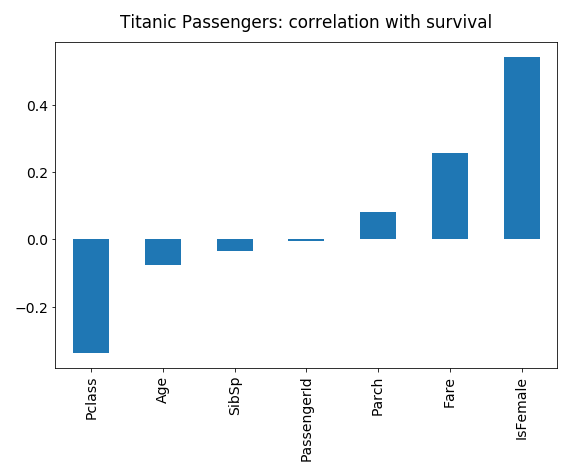

In [37]:
title = 'Titanic Passengers: correlation with survival'
corr_w_surv.iloc[:-1].plot(kind='bar', title=title);

Let's interpret the graph above. The largest correlation with survival is being a woman. We also see that people who paid a higher fare (probably corresponding to a higher class) had a higher chance of surviving. 

The attribute `Pclass` is negatively correlated, meaning the higher the class number, the lower the chance of survival, which makes sense (first class passenger more likely to survive than third class). 

`Age` is also negatively correlated, though mildly, meaning the younger you are the more likely you are to survive. Finally, as expected `PassengerId` does not correlate with survival.

We've barely scratched the surface of what Pandas can do for data manipulation and data exploration. Do refer to the mentioned documentation for a better understanding of its capabilities.

## Visual data exploration

After an initial look at the properties of our tabular dataset, it is often beneficial to dig a little deeper using visualizations. Looking at a graph, we may spot a trend, a particular repeating pattern, or a correlation. Our visual cortex is an extremely good pattern recognizer, so it only makes sense to take advantage of it when possible.

We can represent data visually in several ways, depending on the type of data and on what we are interested in seeing.

Let's create some artificial data and visualize it in different ways.

In [38]:
import numpy as np

We will create 3 data series:
- A noisy stationary sequence centered around zero (`data1`).
- A sequence with larger noise, following a linearly increasing trend (`data2`).
- A sequence with where noise increases over time (`data 3`).
- A sequence with somewhat intermediate noise, following a sinusoidal oscillatory pattern (`data 4`).

In [39]:
N = 1000
data1 = np.random.normal(0, 0.1, N)
data2 = (np.random.normal(1, 0.4, N) + 
         np.linspace(0, 1, N))
data3 = 2 + (np.random.random(N) * 
             np.linspace(1, 5, N))
data4 = (np.random.normal(3, 0.2, N) + 
         0.3 * np.sin(np.linspace(0, 20, N)))

Now, let's create a DataFrame object composing all of our newly created data sequences. First, we aggregate the data using `np.vstack` and we transpose it:

In [40]:
data = np.vstack([data1, data2, data3, data4])
data = data.transpose()

Then we create a data frame with the appropriate column names:

In [41]:
cols = ['data1', 'data2', 'data3', 'data4']

df = pd.DataFrame(data, columns=cols)
df.head()

,data1,data2,data3,data4
0,-0.192759,1.471283,2.017100,3.263033
1,-0.131774,0.982992,2.250955,2.827320
2,-0.105179,1.562932,2.749109,2.943332
3,-0.152099,1.020958,2.051859,3.146438
4,-0.089694,0.513161,2.325075,2.974983


Even when we received a description of these four datasets, it's tough to understand what's going on by simply looking at the table of numbers. Instead, let's look at this data visually.

### Line Plot

Pandas `plot` function defaults to a line plot. This is a good choice if our data comes from an ordered series of consecutive events (for example, the outside temperature in a city over the course of a year).

A line plot represents the values of data in sequential order and makes it easy to spot trends like growth over time or seasonal patterns.

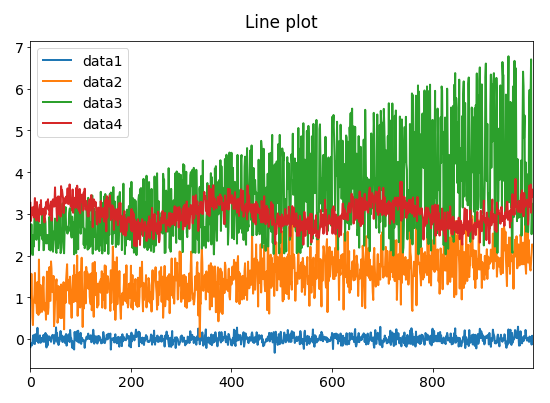

In [42]:
df.plot(title='Line plot');

Above, we're using the `plot` method on the DataFrame. We can obtain the same plot using `matplotlib.pyplot` (and passing in the DataFrame `df` as an argument) like this:

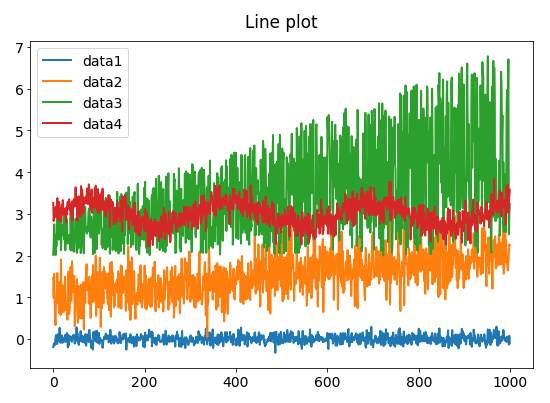

In [43]:
plt.plot(df)
plt.title('Line plot')
plt.legend(['data1', 'data2', 'data3', 'data4']);

### Scatter plot

If data is not in order, and we are looking for correlations between variables, a `scatter` plot is a better choice. We can change the style of the line plot if we want to plot data in order:

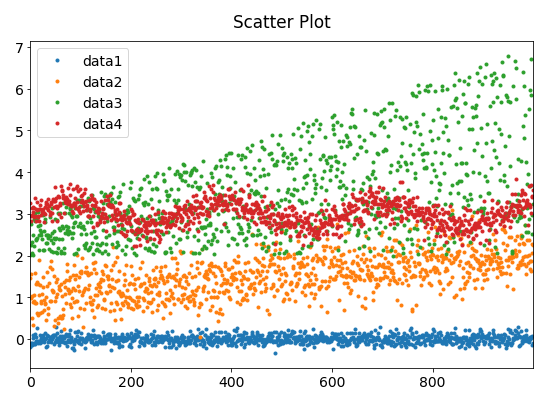

In [44]:
df.plot(style='.', title='Scatter Plot');

alternatively, we can use the `scatter` plot kind if we want to visualize one column against another:

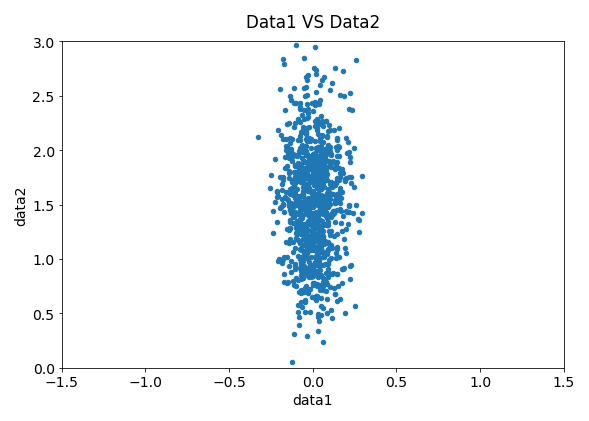

In [45]:
df.plot(kind='scatter', x='data1', y='data2',
        xlim=(-1.5, 1.5), ylim=(0, 3),
        title='Data1 VS Data2');

In the above plot, we see that there is no correlation between `data1` and `data2` (which may be obvious because `data1` is random noise).

### Histograms

Sometimes we are interested in knowing the **frequency of occurrence** of data, and not their order. In this case, we divide the range of data into buckets and ask _how many points fall into each bucket_. This is called a [_histogram_](https://en.wikipedia.org/wiki/Histogram), and it represents the statistical distribution of our data.

This could look like a bell curve, or an exponential decay, or have a weird shape. By plotting the histogram of a feature, we might spot the presence of distinct sub-populations in our data and decide to deal with each one separately.

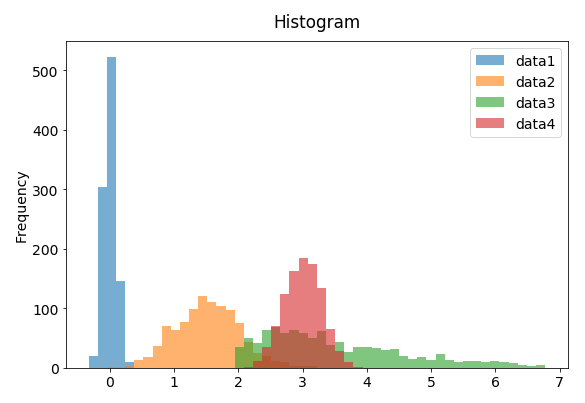

In [46]:
df.plot(kind='hist',
        bins=50,
        title='Histogram',
        alpha=0.6);

Note that we lost all the temporal information contained in our data, for example, the oscillations in `data4` are not visible any longer, all we see is a quite large bell-like distribution, where the sinusoidal oscillations have been summed up in the histogram.

### Cumulative Distribution

A close relative of a histogram is the cumulative distribution, which serves to calculate what fraction of our sample falls below a certain value:

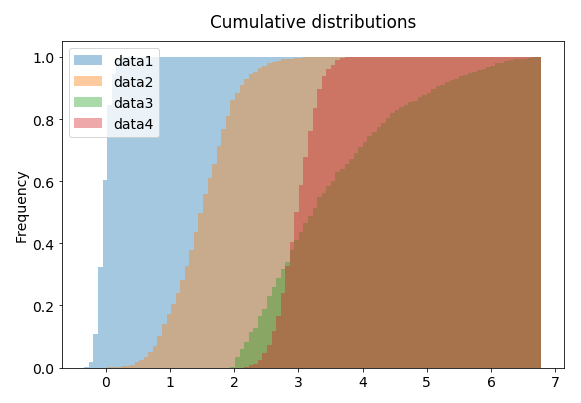

In [47]:
df.plot(kind='hist',
        bins=100,
        title='Cumulative distributions',
        density=True,
        cumulative=True,
        alpha=0.4);

Try to answer these questions:

1. how much of `data1` falls below 2?
2. how much of `data2` falls below 1.5?


> Answers:
1. 100%. If you draw a vertical line that passes through 2, you will see that it crosses the cumulative distribution for `data1` at the high value of 1, which corresponds to 100%.
2. approximately 50%. This can be seen by tracing a vertical line at 1.5 and checking at what height it crosses the `data2` distribution.

### Box plot

A [box plot](https://en.wikipedia.org/wiki/Box_plot) is a useful tool to compare several distributions. It is often used in biology and medicine to compare the results of an experiment with a control group. For example, in the simplest form of a clinical trial for a new drug, there will be two boxes, one for the population that took the drug and the other for the population that took the placebo.

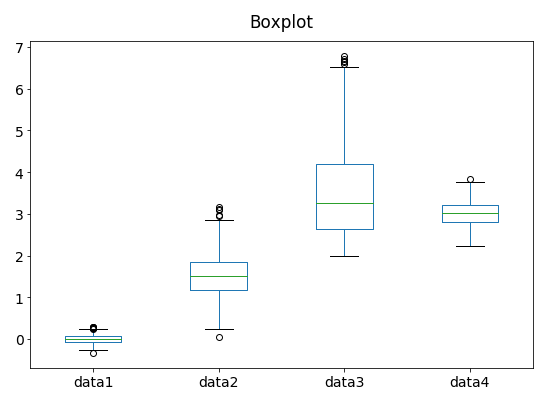

In [48]:
df.plot(kind='box',
        title='Boxplot');

What does this plot mean?
In loose terms, it's as if we were looking at the histogram plot from above. Each box represents the critical facts about the distribution of that particular data series. Let's first get an intuition about the information it shows. Later we will give a more formal definition. 

Let's start with the green horizontal line that cuts each box. It represents the position of the peak of the histogram. We can check the peak for `data1` that the line is at 0, exactly like the very sharp peak of `data1` in the histogram figure, and for `data4` the green line is roughly at 3, precisely like the peak of the red histogram in the previous picture. 

The box represents the bulk of the data, i.e., it gives us an idea of how fat and centered our distribution is around the peak. We can see that the box in `data3` is not centered around the green line, reflecting the fact that the histogram in green is skew. The whiskers give us an idea of the extension of the tails of the distribution. Again, notice how the upper whisker of `data3` extends to high values.

>TIP: For the more statistically inclined readers, here are the formal definitions of the above concepts:
- The green line is the *median* of our data, i.e., the value lying at the midpoint of the distribution.
- The box around it denotes the *confidence interval* (calculated using a [gaussian approximation][1]). Notice how these reproduce more closely the actual size of the noise fluctuations for `data2` and `data4`.
- The whiskers above and below denote the range of data not considered **outliers**. By default they are set to be at `[Q1 - 1.5*IQR, Q3 + 1.5*IQR]`,  where Q1 is the first quartile, Q3 the third quartile and IQR the interquartile range. Notice that these give us a clear indication that `data3` is not symmetric around its median.
- The dots represent data that are considered outliers.

[1]: https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.boxplot

> TIP: In the previous _TIP_, we just introduced the concept of [_outliers_](https://en.wikipedia.org/wiki/Outlier). Outliers are data that are distant from other observations. Outliers may be due for example to variability in the measurement, or they may indicate experimental errors. It is a fundamental concept in Machine Learning, and we'll have the chance to discuss it later.  

### Subplots

We can also combine these plots in a single figure using the subplots command:

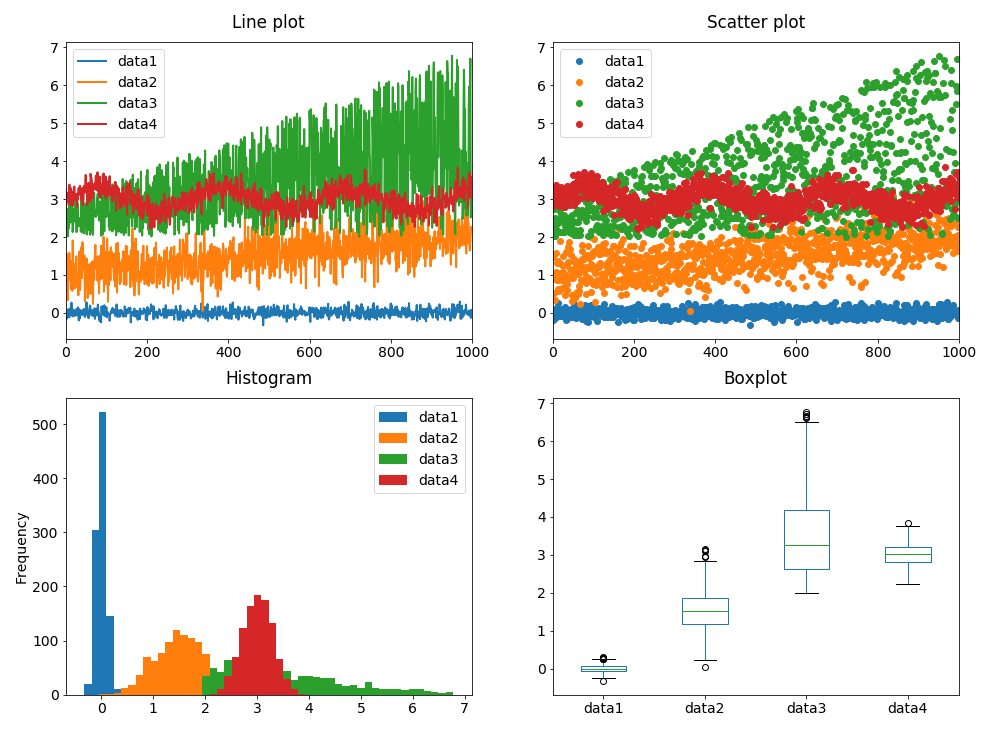

In [49]:
fig, ax = plt.subplots(2, 2, figsize=(16,12))

df.plot(ax=ax[0][0],
        title='Line plot')

df.plot(ax=ax[0][1],
        style='o',
        title='Scatter plot')

df.plot(ax=ax[1][0],
        kind='hist',
        bins=50,
        title='Histogram')

df.plot(ax=ax[1][1],
        kind='box',
        title='Boxplot');

### Pie charts

Pie charts are useful to visualize fractions of a total, for example, we could ask how much of `data1` is greater than 0.1:

In [50]:
gt01 = df['data1'] > 0.1
piecounts = gt01.value_counts()
piecounts

False    855
True     145
Name: data1, dtype: int64

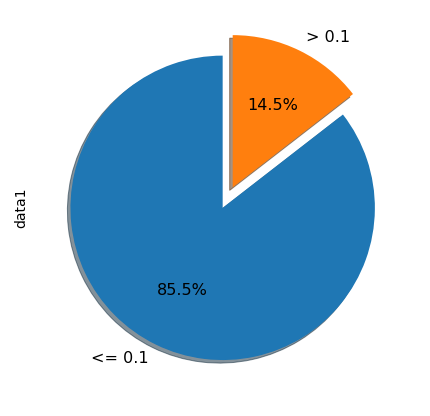

In [51]:
piecounts.plot(kind='pie',
               figsize=(7, 7),
               explode=[0, 0.15],
               labels=['<= 0.1', '> 0.1'],
               autopct='%1.1f%%',
               shadow=True,
               startangle=90,
               fontsize=16);

### Hexbin plot

Hexbin plots are useful to look at 2-D distributions. Let's generate some new data for this plot.

In [52]:
dat1 = np.random.normal((0, 0), 2, size=(1000, 2))
dat2 = np.random.normal((9, 9), 3, size=(2000, 2))
data = np.vstack([dat1, dat2])

df = pd.DataFrame(data, columns=['x', 'y'])

In [53]:
df.head()

,x,y
0,1.416969,3.048222
1,-3.292928,0.890740
2,1.309412,1.291630
3,-3.159988,-1.383990
4,0.650242,1.935277


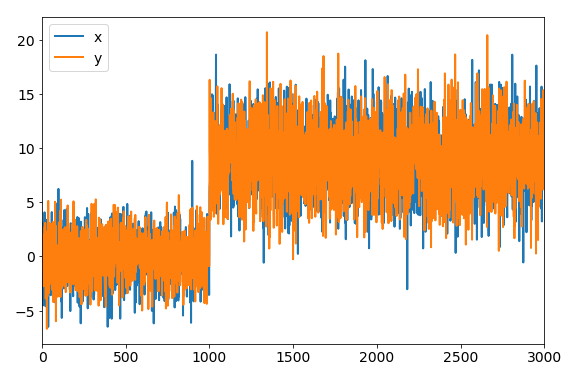

In [54]:
df.plot();

This new data is a stack of two 2-D random sequences, the first one centered in (0, 0) and the second one centered in (9, 9). Let's see how the `hexbin` plot visualizes them.

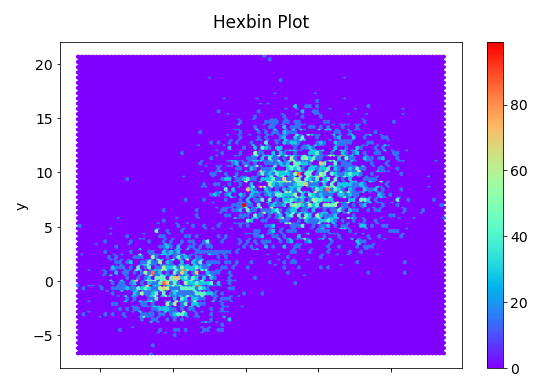

In [55]:
df.plot(kind='hexbin', x='x', y='y', bins=100,
        cmap='rainbow', title='Hexbin Plot');

The Hexbin plot is the 2-D extension of a histogram. It defines regular tiles to cover the 2-D plane and then counts how many points end up in each tile. The color is proportional to the count. Since we created this dataset with points sampled from 2 Gaussian distributions, we expect to see tiles containing more points near the centers of these two Gaussians, which is what we observe above.

We encourage you to have a look at the [this gallery](http://pandas.pydata.org/pandas-docs/stable/visualization.html) to get some inspiration on visualizing your data.
Remember that the choice of visualization ties to the kind of data and the kind of question we are asking.

## Unstructured data

Most often than not, data doesn't come as a nice, well-formatted table. As we mentioned earlier, we could be dealing with images, sound, text, movies, protein molecular structures, video games and many other types of data. 

The beauty of Deep Learning is that it can handle most of this data and learn optimal ways to represent it for the task at hand.

### Images

Let's take images for example. We'll use the [PIL](https://en.wikipedia.org/wiki/Python_Imaging_Library) imaging library (installed as _Pillow_ in Python 3).

In [56]:
from PIL import Image

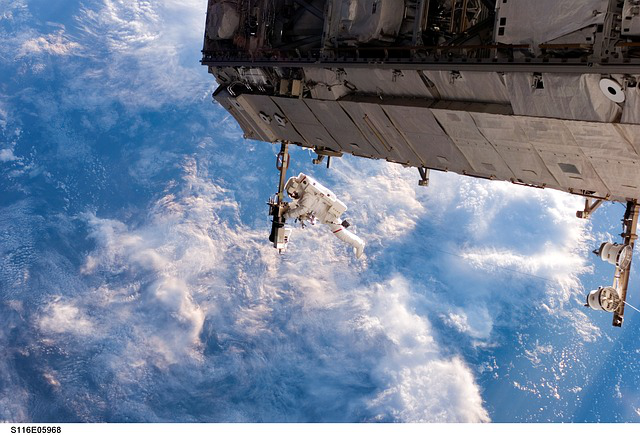

In [57]:
img = Image.open('../data/iss.jpg')
img

We can convert the image to a 3-D array using `numpy`. After all, an image is a table of pixels, each containing the values for red, green, and blue. So, our image is, in fact, a three-dimensional table, where rows and columns correspond to the pixel index and the depth corresponds to the color channel. 

In [58]:
imgarray = np.asarray(img)

In [59]:
imgarray.shape

(435, 640, 3)

The shape of the above array indicates (width, height, channels). While it's quite easy to think of features when dealing with tabular data, it's trickier when we deal with images. We could imagine unrolling this image onto a long list of numbers, walking along each of the three dimensions, and we did so, our dataset of images would again be a tabular dataset, with each row corresponding to a particular image and each column corresponding to a specific pixel and color channel.

In [60]:
imgarray.ravel().shape

(835200,)

However, not only this procedure created 835200 features for our image but also by doing so we lost most of the useful information in the image. In other words, a single pixel in an image carries very little information, while most of the information is in **changes and correlations between nearby pixels**. Neural Networks can learn features from that through a technique called _convolution_, which we will learn about later in this course.

### Sound

Now take sound. Digitally-recorded sound is a long series of ordered numbers representing the sound wave. Let's load an example file.

In [61]:
from scipy.io import wavfile

In [62]:
rate, snd = wavfile.read(filename='../data/sms.wav')

We can play the audio file in the notebook:

In [63]:
from IPython.display import Audio

In [64]:
Audio(data=snd, rate=rate)

This file is sampled at 44.1 kHz, which means 44100 times per second. So, our 3-second file contains over 100k samples:

In [65]:
len(snd)

110250

In [66]:
snd

array([70, 14, 27, ..., 58, 68, 59], dtype=int16)

We can use matplotlib to plot the sound like this:

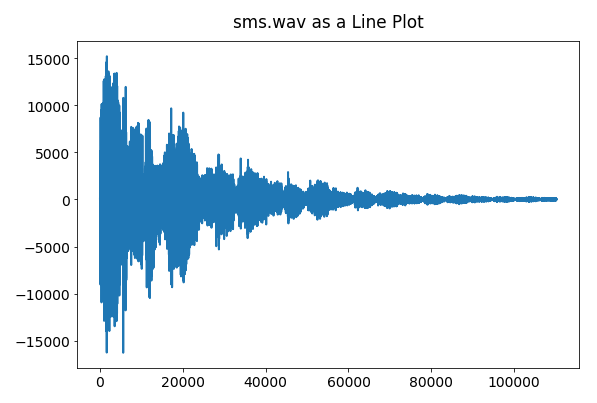

In [67]:
plt.plot(snd)
plt.title('sms.wav as a Line Plot');

If each point in our dataset is a recorded sound, it is likely that each will have a different length. We could still represent our data in tabular form by taking each consecutive sample as a feature and padding with zeros the records that are shorter, but these extra zeros would carry no information (unless we had taken great care to synchronize each file so that the sound started at the same sample number). 

Besides, sound information is carried in modulations of frequency, suggesting that the raw form may not be the best to use. As we shall see, there are better ways to represent sound and to feed it to a Neural Network for tasks like music recognition or speech-to-text.

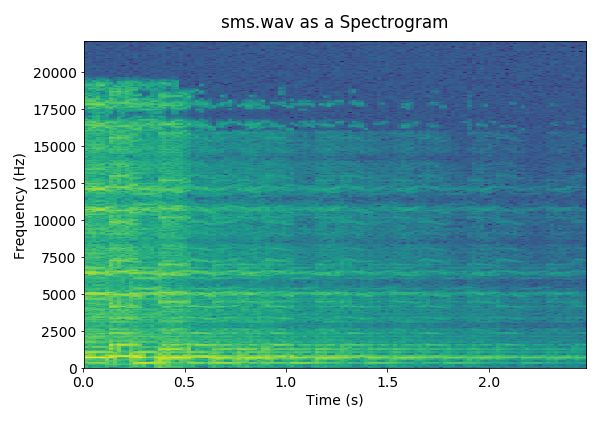

In [68]:
_ = plt.specgram(snd, NFFT=1024, Fs=44100)
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')
plt.title('sms.wav as a Spectrogram');

### Text data

Text documents pose similar challenges. If each data point is a document, we need to find a good representation for it if we want to build a model that identifies it. We could use a dictionary of words and count the relative frequencies of words, but with Neural Networks we can do better than this.

In general, this is called the _problem of representation_, and Deep Learning is a great technique to tackle it!

## Feature Engineering

As we have seen, unstructured data does not look like tabular data. The traditional solution to connect the two is *feature engineering*. 

In feature engineering, an expert uses her domain knowledge to create features that correctly encapsulate the relevant information from the unstructured data. Feature engineering is fundamental to the application of Machine Learning, and it is both challenging and expensive. 

For example, if we are training a Machine Learning model on a face recognition task from images, we could use well tested existing methods to detect a face and measure the distance between points like eyes, mouth, and nose. These distances would be the engineered features we would pass to the model. 

Similarly, in the domain of speech recognition, features based on [wavelets](https://en.wikipedia.org/wiki/Wavelet) and [Short Time Fourier Transforms](https://en.wikipedia.org/wiki/Short-time_Fourier_transform) were the standard until not long ago. 

Deep Learning disrupts feature engineering by **learning the best features directly from the raw unstructured data**. This approach is not only  powerful but also much much faster. It is a paradigm shift: more versatile technique taking the role of the domain expert.

## Exercises

Now it's time to test what you've learned with a few exercises.

### Exercise 1

- load the dataset: `../data/international-airline-passengers.csv`
- inspect it using the `.info()` and `.head()` commands
- use the function `pd.to_datetime()` to change the column type of 'Month' to a DateTime type (you can find the doc [here](http://pandas.pydata.org/pandas-docs/version/0.20/generated/pandas.to_datetime.html))
- set the index of df to be a DateTime index using the column 'Month' and the `df.set_index()` method
- choose the appropriate plot and display the data
- choose appropriate scale
- label the axes

### Exercise 2

- load the dataset: `../data/weight-height.csv`
- inspect it
- plot it using a scatter plot with Weight as a function of Height
- plot the male and female populations with two different colors on a new scatter plot
- remember to label the axes

### Exercise 3

- plot the histogram of the heights for males and females on the same plot
- use `alpha` to control transparency in the plot command
- plot a vertical line at the mean of each population using `plt.axvline()`
- bonus: plot the cumulative distributions

### Exercise 4

- plot the weights of the males and females using a box plot
- which one is easier to read?
- (remember to put in titles, axes, and legends)

### Exercise 5

- load the dataset: `../data/titanic-train.csv`
- learn about `scattermatrix` [here](http://pandas.pydata.org/pandas-docs/stable/visualization.html)
- display the data using a `scattermatrix`